# Este es un  paso a paso del algoritmo de Word2vec, el cuál utiliza un modelo de regresión logística mutinomial o Softmax  como una red neuronal de tres capas (1 capa de entrada, 1 capa oculta y 1 capa de salida) produciendo la representación vectorial de las palabras más cercanas a cada palabra centro en un vocabulario dado que no es anotado a mano sino que el conjunto de entrenamiento se forma  de la co-ocurrencia con ventana fija y parametrizable de las palabras centros con sus palabras contextuales.

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np # version 1.16

# setup a virtual environment
# pipenv shell
# pip install tensorflow numpy==1.16 sklearn matplotlib

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
corpus_raw1 = 'He is the king . The king is royal . She is the royal  queen '
corpus_raw = ' Me gusta jugar fútbol con mis amigos'
# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
print(vocab_size)

7


In [30]:

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())
    print(sentences)
    #print(word2int['sentences.split()'])

[['me', 'gusta', 'jugar', 'fútbol', 'con', 'mis', 'amigos']]


#  En esta parte se obtienen todas las parejas de palabras que co-ocurren entre la palabra centro y las palabras de contexto dependiendo del tamaño de la ventana. Si el tamaño de la ventana  WINDOW_SIZE  es más grande  hay más posibilidad de encontrar más palabras cercanas  y el conjunto de entrenamiento crece.

In [9]:
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])
       

# Aquí se forman todas las co-ocurrencias de ventana fija (WINDOW_SIZE=2) de cada palabra centro con las palabras de contexto, que son 2 a la izquierda y 2 a la derecha. En este caso cada palabra del vocabulario se convierte en una palabra centro y las que están alrededor las palabras contextuales.

In [10]:
print(data)
print(len(data))

[['me', 'gusta'], ['me', 'jugar'], ['gusta', 'me'], ['gusta', 'jugar'], ['gusta', 'fútbol'], ['jugar', 'me'], ['jugar', 'gusta'], ['jugar', 'fútbol'], ['jugar', 'con'], ['fútbol', 'gusta'], ['fútbol', 'jugar'], ['fútbol', 'con'], ['fútbol', 'mis'], ['con', 'jugar'], ['con', 'fútbol'], ['con', 'mis'], ['con', 'amigos'], ['mis', 'fútbol'], ['mis', 'con'], ['mis', 'amigos'], ['amigos', 'con'], ['amigos', 'mis']]
22


# Las parejas de entrenamiento (x_train,y_train)  se forman de las  palabras centro con las palabras de contexto del vocabulario, en la tabla  los ejemplos de entrenamiento  de (I,like) y (I,palying) tienen las siguientes representaciones  ([1,0,0,0,0,0,0],[0,1,0,0,0,0,0]) y ([1,0,0,0,0,0,0],[0,0,1,0,0,0,0])

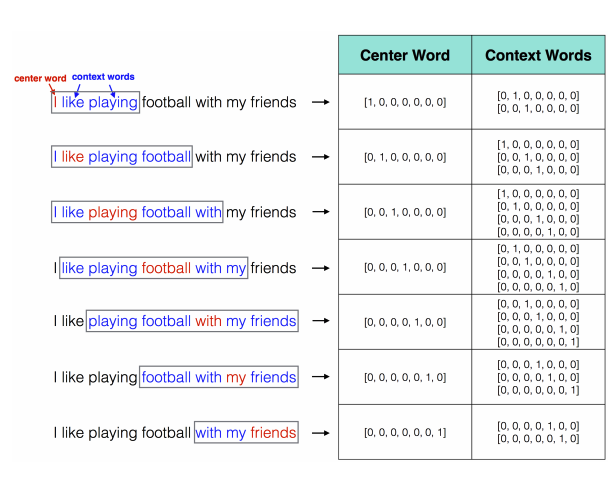

In [20]:
from IPython.display import Image
Image(filename='x-train.png')

# Esta es la función one-hot que asigna 1 en la posición de la palabra dependiendo de su ubicación en el vector que tiene como dimensión el tamaño del vocabulario.

In [12]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

# Las x_train y y_train son las mismas palabras del vocabulario que son organizadas dependiendo del tamaño del vocabulario y la ventena de acercamiento, para este ejemplo, el tamaño de la ventana es de 2 con tamaño de vocabulario de 7, por lo tanto tendríamos  22 ejemplos  representados en one-hot.  En términos generales, x_train y y_train son dos matrices de (22,7), por cada vector de x_train de 7 elementos hay un vector y_train de 7 elementos.

In [34]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
    #print(data_word[0],data_word[1])
    #print(x_train,y_train)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

#print(x_train,'parejas',y_train,'\n') 
    #print(data_word[0],y_train)
# convert them to numpy arrays


print('conjunto X de entrenamiento---------')
print(x_train)
print(x_train.shape, y_train.shape)
print('conjunto y de entrenamiento---------')
print(y_train)

conjunto X de entrenamiento---------
[[0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
(22, 7) (22, 7)
conjunto y de entrenamiento---------
[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0

In [24]:
print(x_train.shape[0])
#puntos de entrenamiento, donde cada punto tiene 7 dimensiones, que crecen depeniendo de la ventana de contexto

40


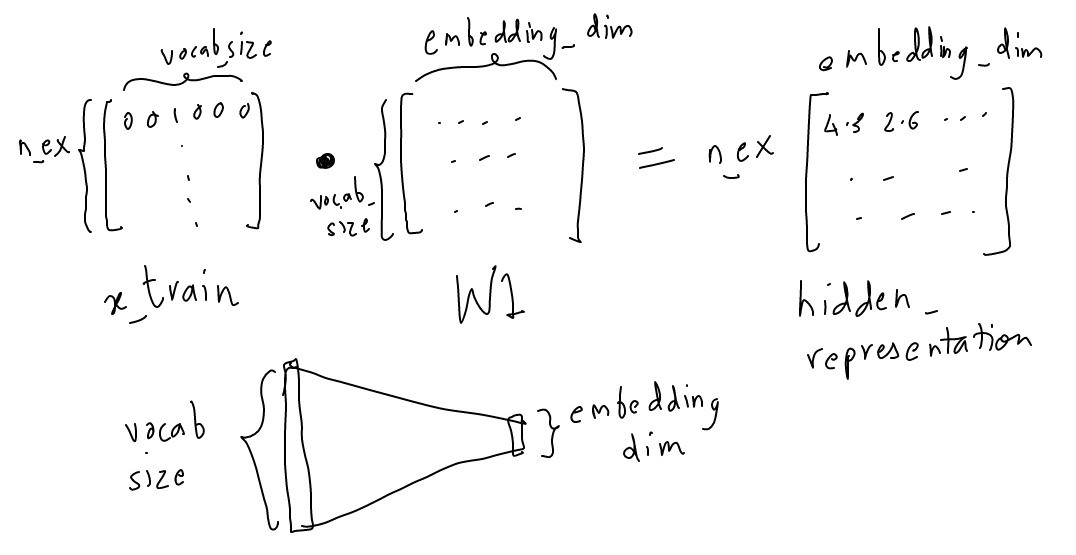

In [30]:
from IPython.display import Image
Image(filename='train-embedding.jpeg')
 

# En esta parte se obtiene la reducción del tamaño del vocabulario a un embedding más pequeño y más denso usando una distribución probabilística Gaussiana (librería de numpy) tanto para W1 y para b1. Reservado el espacio de (x_train,y_train) se obtiene una capa de representación oculta multiplicando W1.x +b1 (este es el modelo de perceptron básico).  Se puede observar que las dimensiones de la matriz W1 tiene en las filas el tamaño del vocubulario que viene de la entrada de las palabras  y en las columnas la dimensión del embedding ajustable y parametrizable, el b1 tiene la dimensión del embedding. 

In [44]:
# Se reserva el espacio para x_train y y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 10 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)
print(hidden_representation.shape)

(?, 10)


 # La matriz W2 tiene como  dimensiones el embedding_dim que es un parámetro ajustable y se sugiere que sea de 300 y el tamaño del vocabulario  para que sea compatible con la salida de los vectores de contexto. En esta parte se usa la función  de regresión multinomial  Softmax para volver estos valores reales en probabildades, la entrada de los x ya viene con sus pesos dimensionada  de manera lineal  x.W1 +b1 pero que a su vez W1 se ajusta de acuerdo a la optimización de  la función de perdida sobre los datos de entrenamiento. Finalmente, la Softmax es la predicción del modelo que son las palabras  más cercanas a la palabra de entrada y la vectorización de las palabras del vocabulario se determinan por la matriz W1.  

In [19]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

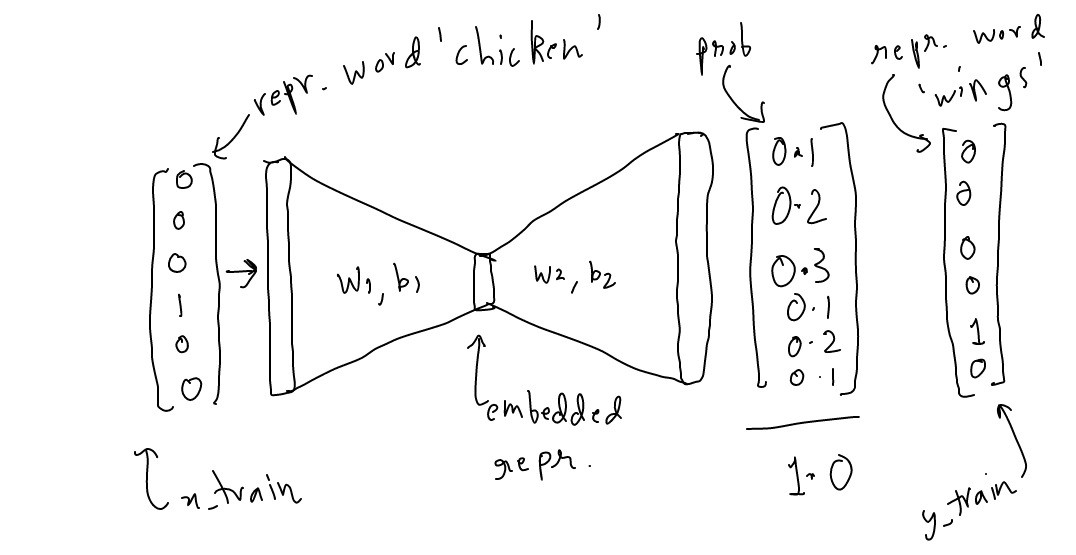

In [83]:
from IPython.display import Image
Image(filename='training-embedding1.jpeg')

# Optimización del modelo usando gradiente para dismunir la pérdida de la predicción. En esta parte la función croos_entropy_loss calcula la función de tolerancia de perdida sobre el y_label y la predicción hasta que haya una reducción del error según tolerancia y luego  la función GradientDescentOptimizer optimiza la minimización que hace la función cross_entropy_loss. Finalmente, el modelo es entrenado y predicho. Pero quizás la parte más importante del modelo predictivo de Word2vec es la matriz reducida de embeddings que produce (W1,b1) que es la representación vectorial del vocabulario.

In [20]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)
n_iters = 100
# train for n_iter iterations
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

loss is :  5.8429112
loss is :  5.474028
loss is :  5.160271
loss is :  4.8837566
loss is :  4.634745
loss is :  4.4080048
loss is :  4.201588
loss is :  4.0159016
loss is :  3.852084
loss is :  3.7096026
loss is :  3.5853586
loss is :  3.4753852
loss is :  3.3764293
loss is :  3.2861824
loss is :  3.2030482
loss is :  3.1259184
loss is :  3.0540137
loss is :  2.9867733
loss is :  2.923774
loss is :  2.8646772
loss is :  2.809191
loss is :  2.7570486
loss is :  2.7079976
loss is :  2.6617944
loss is :  2.618205
loss is :  2.5770056
loss is :  2.5379894
loss is :  2.500965
loss is :  2.465761
loss is :  2.432224
loss is :  2.4002187
loss is :  2.3696272
loss is :  2.3403451
loss is :  2.3122828
loss is :  2.2853606
loss is :  2.2595077
loss is :  2.2346635
loss is :  2.2107723
loss is :  2.1877854
loss is :  2.165658
loss is :  2.1443508
loss is :  2.123826
loss is :  2.1040514
loss is :  2.0849948
loss is :  2.0666273
loss is :  2.048922
loss is :  2.0318532
loss is :  2.0153966
loss i

# Más allá de la predicción son los vectores producidos en ese ajuste. Eventualmente se estabiliza en una pérdida constante. Aunque no podemos obtener una alta precisión, lo que más interesa es W1 y b1, que corresponden a la vectorización de las palabras que fueron representadas por  one-hot.


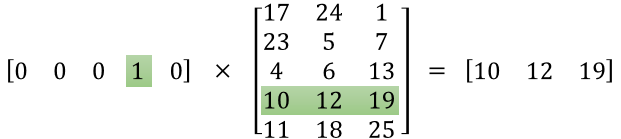

In [99]:
from IPython.display import Image
Image(filename='one-hot.png')

In [21]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[ 1.8643064  -0.3155481   0.8310172  -1.6659393   0.8333837  -0.50594425
  -0.7029339  -0.5536147   0.64956874 -1.1331846 ]
 [ 0.9585857  -1.4814333   0.48349562 -1.5452626  -1.1702965  -0.36645466
   0.07794312 -1.2986094   0.16158125 -0.8072512 ]
 [ 0.60520756 -0.18740673 -0.762696   -0.2362796  -1.0396659  -2.6302063
   1.2853795  -0.6663846  -0.22508024  0.6765911 ]
 [-0.341677    1.0363123   0.6272982  -0.99581873 -0.49012542 -0.23172554
  -1.1632646  -0.56079876  0.4650523  -0.7741673 ]
 [-0.00718862 -0.21603727  0.9594931  -3.300948   -0.54389423 -0.597036
   1.3477604  -0.10349844  0.03604291 -0.44504443]
 [-0.6182359   1.3937043  -2.8701222  -0.90284705 -0.44126245  0.03849363
  -0.0645646   0.03741404  0.3570279  -0.03902314]
 [ 0.14654404  0.80997074 -1.1680279   0.10689966 -0.8021037  -1.2116089
  -0.18170053  0.9604717   0.5885346   1.5587448 ]]
----------
[ 0.00500403  1.0454059   0.17254792  0.03471282  0.39775845 -0.35151172
 -1.4753956   1.5291687   0.3524879   1.2129

In [23]:
vectors = sess.run(W1 + b1)

# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)


[[ 1.8693105e+00  7.2985780e-01  1.0035651e+00 -1.6312265e+00
   1.2311422e+00 -8.5745597e-01 -2.1783295e+00  9.7555405e-01
   1.0020566e+00  7.9728246e-02]
 [ 9.6358973e-01 -4.3602741e-01  6.5604353e-01 -1.5105498e+00
  -7.7253807e-01 -7.1796638e-01 -1.3974525e+00  2.3055935e-01
   5.1406914e-01  4.0566158e-01]
 [ 6.1021161e-01  8.5799915e-01 -5.9014809e-01 -2.0156679e-01
  -6.4190745e-01 -2.9817181e+00 -1.9001603e-01  8.6278415e-01
   1.2740766e-01  1.8895040e+00]
 [-3.3667296e-01  2.0817182e+00  7.9984611e-01 -9.6110594e-01
  -9.2366964e-02 -5.8323729e-01 -2.6386602e+00  9.6836996e-01
   8.1754017e-01  4.3874550e-01]
 [-2.1845871e-03  8.2936859e-01  1.1320410e+00 -3.2662351e+00
  -1.4613578e-01 -9.4854772e-01 -1.2763512e-01  1.4256703e+00
   3.8853079e-01  7.6786840e-01]
 [-6.1323184e-01  2.4391103e+00 -2.6975744e+00 -8.6813426e-01
  -4.3504000e-02 -3.1301808e-01 -1.5399601e+00  1.5665828e+00
   7.0951581e-01  1.1738896e+00]
 [ 1.5154807e-01  1.8553766e+00 -9.9547994e-01  1.4161247e

In [ ]:
print(vectors[ word2int['jugar'] ])
# say here word2int['queen'] is 2